In [1]:
import os
from itertools import product
import config
import json
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

In [2]:

api = wandb.Api()


project_path = "loriss/pretraining"

metric_path="train/loss"
runs = api.runs(project_path)


data = []
for run in runs:
    try:
        train = run.history(keys=["train/loss"]).set_index("_step") 
        eval = run.history(keys=["eval/loss"]).set_index("_step")
     
        epoch = run.history(keys=["train/epoch"]).set_index("_step")
        epoch["model"] = run.name  
        data.append(epoch.join(train).join(eval) )
    except:
        print("skipping", run.name)


df = pd.concat(data, ignore_index=True)



def get_model(x):
    for dataset in config.datasets:
        d = os.path.basename(dataset) 
        if d in x:
            return d
def get_curriculum(x):
    for curriculum in config.baseline_curricula:
        if curriculum.replace(".pt","") in x:
            return curriculum
    for curriculum in config.influence_curricula:
        if curriculum.replace(".pt","") in x:
            return curriculum
    # print(x)
    # raise NotImplementedError
df["dataset"] = df["model"].apply(get_model)
df["curriculum"] = df["model"].apply(get_curriculum)

df.to_csv("./pretraining_metrics.csv")
df

,train/epoch,model,train/loss,eval/loss,dataset,curriculum
0,0.086843,models/babylm_2024_10m_curriculum_llama_random,122.0504,NaN,babylm_2024_10m_curriculum,random.pt
1,0.173686,models/babylm_2024_10m_curriculum_llama_random,88.4017,NaN,babylm_2024_10m_curriculum,random.pt
2,0.260530,models/babylm_2024_10m_curriculum_llama_random,77.1281,NaN,babylm_2024_10m_curriculum,random.pt
3,0.347373,models/babylm_2024_10m_curriculum_llama_random,70.9591,NaN,babylm_2024_10m_curriculum,random.pt
4,0.434216,models/babylm_2024_10m_curriculum_llama_random,67.7829,NaN,babylm_2024_10m_curriculum,random.pt
...,...,...,...,...,...,...
2143,2.776848,models/stratified_10m_curriculum_llama_llama_influence_incr_bins_dirac,62.7759,NaN,stratified_10m_curriculum,_influence_incr_bins_dirac.pt
2144,2.872519,models/stratified_10m_curriculum_llama_llama_influence_incr_bins_dirac,60.2234,NaN,stratified_10m_curriculum,_influence_incr_bins_dirac.pt
2145,2.968189,models/stratified_10m_curriculum_llama_llama_influence_incr_bins_dirac,53.8163,NaN,stratified_10m_curriculum,_influence_incr_bins_dirac.pt
2146,2.998804,models/stratified_10m_curriculum_llama_llama_influence_incr_bins_dirac,NaN,4.433662,stratified_10m_curriculum,_influence_incr_bins_dirac.pt


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 304x500 with 0 Axes>

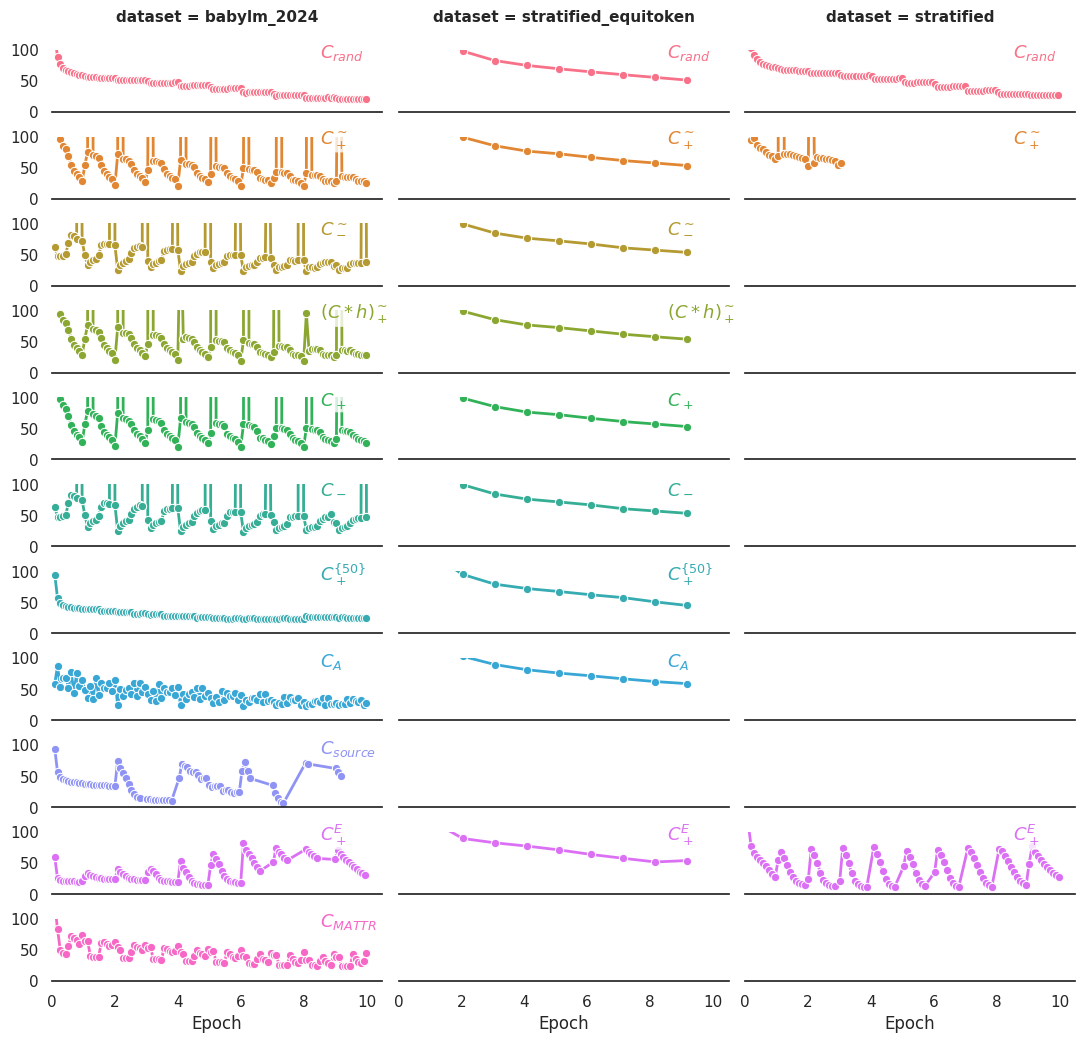

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 304x500 with 0 Axes>

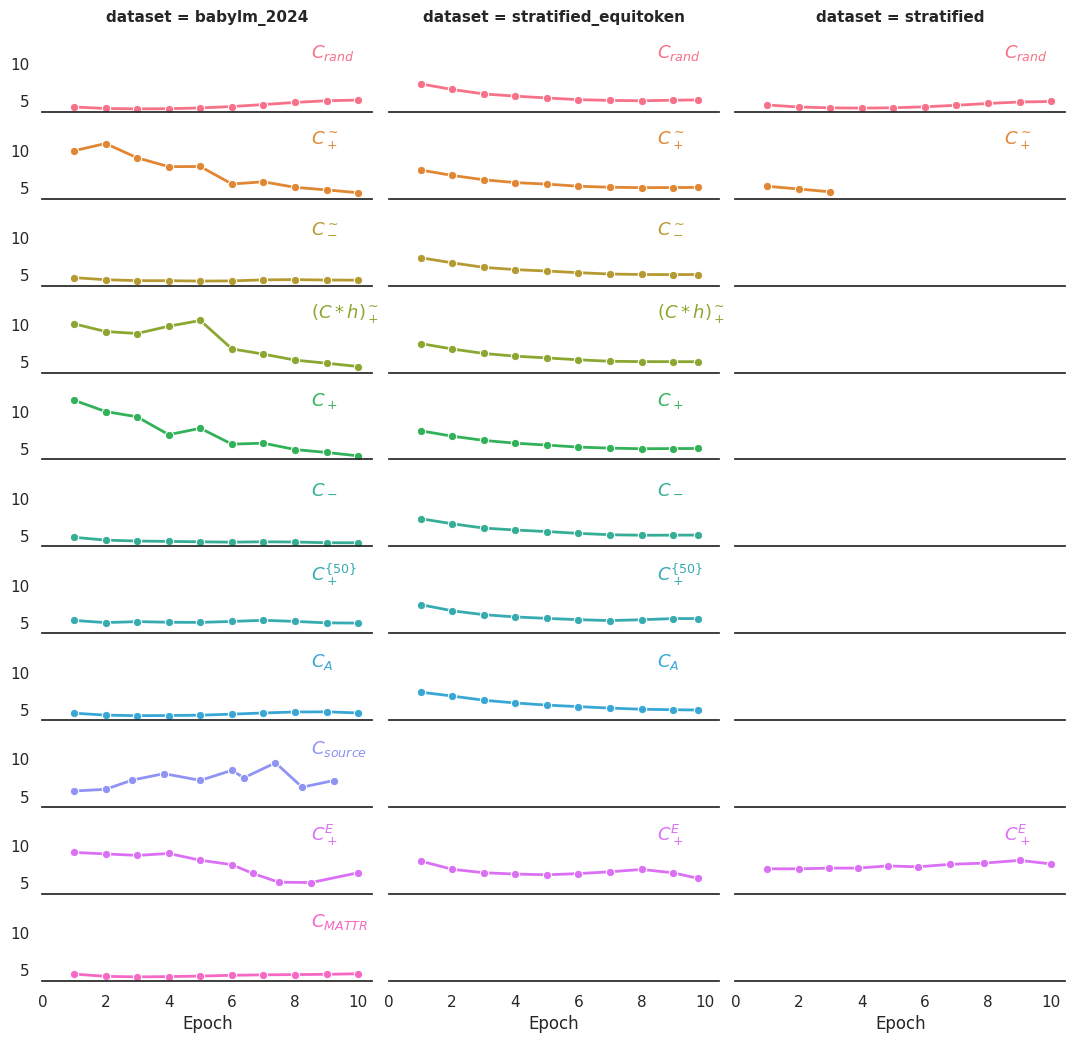

In [3]:
WIDTH_TWO_COL = 3.04
FONT_SIZE = 10


def rename(x):
    if "_influence_epoch_repetition" in x:
        return r"$C^E_+$"
    if "random" in x:
        return r"$C_{rand}$"
    if "_influence_incr_bins_dirac" in x:
        return r"$C^{\sim}_+$"
    if "_influence_decr_bins_dirac" in x:
        return r"$C^{\sim}_-$"
    if "_influence_incr_bins_lognorm" in x:
        return r"$(C*h)^{\sim}_+$"

    if "_influence_incr_cp_dirac" in x:
        return r"$C_+$"
    if "_influence_decr_cp_dirac" in x:
        return r"$C_-$"
    if "_influence_top_50_cp_shuffled" in x:
        return r"$C^{\{50\}}_+$"
    if "_influence_tracin_sandwich" in x:
        return r"$C_{A}$"
    if "source_difficulty" in x:
        return r"$C_{source}$"
    if "mattr_increasing" in x:
        return r"$C_{MATTR}$"
    if "perplexity_increasing" in x:
        return r"$C_{PPL}$"
    if "random" in x:
        return r"$C_{rand}$"
    else:
        return x


def plot(metric_path="train/loss"):
    plt.figure(figsize=(WIDTH_TWO_COL, 5))
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    g = sns.FacetGrid(df, row="curriculum", hue="curriculum",col="dataset", aspect=4, height=1.1, sharey=True, sharex=True,margin_titles=True)
    g.map(sns.lineplot, "train/epoch", metric_path, linewidth=2,marker="o")
    def label(x, color, label):
        ax = plt.gca()
        ax.text((WIDTH_TWO_COL/3)-0.2, 0.95, rename(label), fontweight="bold", color=color, fontsize=FONT_SIZE+3,
                ha="left", va="center", transform=ax.transAxes,
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1',alpha=0.8))
        data = ax.lines[0].get_ydata()


        if "train/loss" in metric_path:
            ax.set_ylim(0,100)
        ax.set_xlim(0,)
    g.map(label, "train/epoch")
    g.set_titles("{col_name}","", size=11)
    g.set_axis_labels( "Epoch","",)
    g.despine(left=True)
    g.figure.subplots_adjust(hspace=0.4, wspace=0.05)  
    for ax in g.axes.flat:
        title = ax.get_title()
        ax.set_title(title.replace("_10m_curriculum",""), fontsize=11,pad=20,fontweight="bold")

    plt.show()

plot("train/loss")
plot("eval/loss")

In [4]:
get_model_name = lambda dataset, model_type, curriculum: os.path.join(dataset + ("_" + model_type) + "_" + curriculum.split(".")[0])

jobs =[(get_model_name(dataset, model_type, curriculum), dataset, model_type, curriculum) for dataset, model_type, curriculum in product(config.datasets, config.model_types, config.baseline_curricula)]
jobs.extend([(get_model_name(dataset, model_type, model_type + curriculum), dataset, model_type, model_type + curriculum) for dataset, model_type, curriculum  in (product(config.datasets, config.model_types, config.influence_curricula))])
jobs.extend([(model_name, "external", model_type, "external") for model_name, model_type in config.baseline_models])

def get_df(model, dataset, model_type, curriculum):

    blimp_out_path = f"./eval/blimp/{os.path.basename(model)}/blimp_results.json"


    print(model)
    df = None
    try:
        with open(blimp_out_path) as f:
            d = json.load(f)

    except:
        print("skipping", blimp_out_path, "not found")
        return None

    df = pd.DataFrame(d["results"]).T

    df.index.name="metric"
    df = df.drop("alias", axis=1)
    df.columns = [col.replace(',none', '').replace("acc_stderr", "std") for col in df.columns]
    df = df.loc[~df.index.isin(["blimp_supplement", "blimp_filtered"]),:]
    df[["model", "dataset", "model_type", "curriculum"]] = model, dataset, model_type, curriculum
    return df

df = pd.concat((get_df(*job) for job in jobs))
df

loris3/babylm_2024_10m_curriculum_llama_random
loris3/babylm_2024_10m_curriculum_llama_source_difficulty
loris3/babylm_2024_10m_curriculum_llama_mattr_increasing
skipping ./eval/blimp/babylm_2024_10m_curriculum_llama_mattr_increasing/blimp_results.json not found
loris3/babylm_2024_10m_curriculum_llama_perplexity_increasing
skipping ./eval/blimp/babylm_2024_10m_curriculum_llama_perplexity_increasing/blimp_results.json not found
loris3/stratified_equitoken_10m_curriculum_llama_random
loris3/stratified_equitoken_10m_curriculum_llama_source_difficulty
skipping ./eval/blimp/stratified_equitoken_10m_curriculum_llama_source_difficulty/blimp_results.json not found
loris3/stratified_equitoken_10m_curriculum_llama_mattr_increasing
skipping ./eval/blimp/stratified_equitoken_10m_curriculum_llama_mattr_increasing/blimp_results.json not found
loris3/stratified_equitoken_10m_curriculum_llama_perplexity_increasing
skipping ./eval/blimp/stratified_equitoken_10m_curriculum_llama_perplexity_increasing/bl

,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.936989,0.008305,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_filtered,0.963995,0.006353,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_long_distance_filtered,0.990857,0.00322,JLTastet/baby-llama-2-345m-run2,external,llama,external


In [5]:
df

,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.936989,0.008305,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_filtered,0.963995,0.006353,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_long_distance_filtered,0.990857,0.00322,JLTastet/baby-llama-2-345m-run2,external,llama,external


In [6]:
import pandas as pd
from scipy import stats

models = df["model"].unique()
random_acc = pd.to_numeric(df[df["model"] == "loris3/babylm_2024_10m_curriculum_llama_random"]["acc"])

results = []

for model in models:
    if model != "loris3/babylm_2024_10m_curriculum_llama_random":
        model_acc = pd.to_numeric(df[df["model"] == model]["acc"])
        
        t_stat, p_val = stats.ttest_rel(model_acc, random_acc)
     
        
        avg_improvement = (model_acc - random_acc).mean()
        results.append((model, model_acc.mean(), random_acc.mean(), p_val, avg_improvement, p_val < 0.05))

results_df = pd.DataFrame(results, columns=["model","model_acc", "random_acc","p_value","average_improvement", "significant"])




In [7]:
results_df.sort_values(by="average_improvement")

,model,model_acc,random_acc,p_value,average_improvement,significant
20,ltg/gpt-bert-babylm-small,0.426949,0.631135,1.678523e-08,-0.204186,True
11,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_epoch_repetition,0.574261,0.631135,3.721346e-05,-0.056874,True
3,loris3/babylm_2024_10m_curriculum_llama_llama_influence_epoch_repetition,0.579520,0.631135,3.068260e-07,-0.051615,True
19,loris3/stratified_10m_curriculum_llama_llama_influence_epoch_repetition,0.586505,0.631135,4.826289e-04,-0.044630,True
9,loris3/babylm_2024_10m_curriculum_llama_llama_influence_top_50_cp_shuffled,0.594512,0.631135,9.663252e-03,-0.036622,True
17,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_top_50_cp_shuffled,0.605951,0.631135,6.331272e-02,-0.025184,False
0,loris3/babylm_2024_10m_curriculum_llama_source_difficulty,0.622037,0.631135,4.372231e-01,-0.009098,False
16,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_decr_cp_dirac,0.622471,0.631135,4.264069e-01,-0.008664,False
1,loris3/stratified_equitoken_10m_curriculum_llama_random,0.630457,0.631135,9.547302e-01,-0.000678,False
15,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_incr_cp_dirac,0.634610,0.631135,7.566904e-01,0.003475,False


In [8]:
16*32*4*480*(10000000/100) >  9*10000000

True

In [9]:
results_df.sort_values(by="average_improvement")

,model,model_acc,random_acc,p_value,average_improvement,significant
20,ltg/gpt-bert-babylm-small,0.426949,0.631135,1.678523e-08,-0.204186,True
11,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_epoch_repetition,0.574261,0.631135,3.721346e-05,-0.056874,True
3,loris3/babylm_2024_10m_curriculum_llama_llama_influence_epoch_repetition,0.579520,0.631135,3.068260e-07,-0.051615,True
19,loris3/stratified_10m_curriculum_llama_llama_influence_epoch_repetition,0.586505,0.631135,4.826289e-04,-0.044630,True
9,loris3/babylm_2024_10m_curriculum_llama_llama_influence_top_50_cp_shuffled,0.594512,0.631135,9.663252e-03,-0.036622,True
17,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_top_50_cp_shuffled,0.605951,0.631135,6.331272e-02,-0.025184,False
0,loris3/babylm_2024_10m_curriculum_llama_source_difficulty,0.622037,0.631135,4.372231e-01,-0.009098,False
16,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_decr_cp_dirac,0.622471,0.631135,4.264069e-01,-0.008664,False
1,loris3/stratified_equitoken_10m_curriculum_llama_random,0.630457,0.631135,9.547302e-01,-0.000678,False
15,loris3/stratified_equitoken_10m_curriculum_llama_llama_influence_incr_cp_dirac,0.634610,0.631135,7.566904e-01,0.003475,False


In [10]:
df

,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.936989,0.008305,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_filtered,0.963995,0.006353,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_long_distance_filtered,0.990857,0.00322,JLTastet/baby-llama-2-345m-run2,external,llama,external


In [11]:
df

,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.936989,0.008305,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_filtered,0.963995,0.006353,JLTastet/baby-llama-2-345m-run2,external,llama,external
blimp_wh_vs_that_no_gap_long_distance_filtered,0.990857,0.00322,JLTastet/baby-llama-2-345m-run2,external,llama,external


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/tmp/ipykernel_3633195/1751959014.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xticklabels, rotation=45, ha="right")  # Rotation and alignment
/tmp/ipykernel_3633195/1751959014.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xticklabels, rotation=45, ha="right")  # Rotation and alignment


<Figure size 304x500 with 0 Axes>

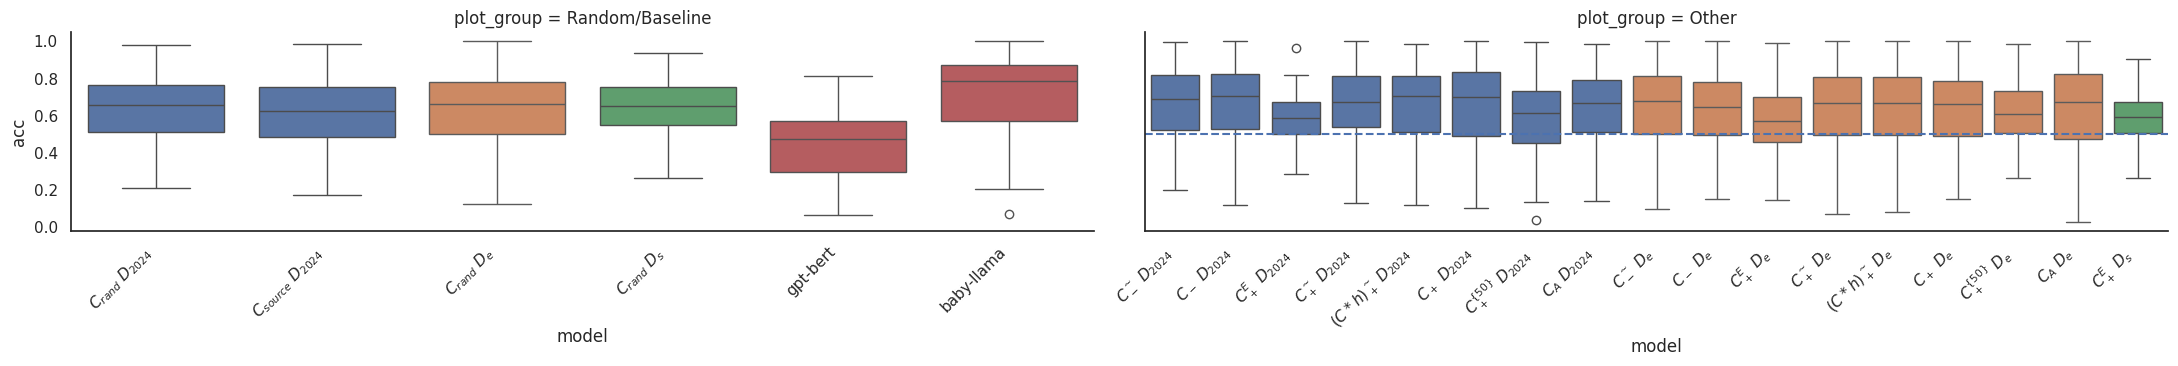

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
WIDTH_TWO_COL = 3.04
FONT_SIZE = 10
plt.figure(figsize=(WIDTH_TWO_COL, 5))

def get_curriculum_type(x):
    if "influence" in x:
        return "influence"
    if "random" in x:
        return "random"
    if "external" in x:
        return "external"
    return "baseline"



df["curriculum_type"] = df["model"].apply(get_curriculum_type)
df['curriculum_type'] = pd.Categorical(df['curriculum_type'], categories=['random', 'baseline', 'influence'], ordered=True)
df = df.sort_values(by="curriculum_type")

df = df.sort_values(by=["curriculum_type", "curriculum"])

df['plot_group'] = df['curriculum_type'].apply(lambda x: 'Random/Baseline' if x in ['random', 'baseline'] else 'Other')



In [ ]:
df[df["model"].str.contains("random")]

In [ ]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


g = sns.FacetGrid(df[df["model"] == baseline_model], hue="dataset",col="plot_group", aspect=4, height=3.1, sharey=True, sharex=False,margin_titles=False)
g.map(sns.boxplot, "model", "acc")

def rename_dataset(x):
    if "2024" in x:
        return "$D_{2024}$"
    if "equitoken" in x:
        return "$D_{e}$"
    if "stratified" in x:
        return "$D_{s}$"
    return x

def rename_model(x):
    if "gpt-bert" in x:
        return "gpt-bert"
    if "baby-llama" in x:
        return "baby-llama"
    else:
        return f"{rename(x)} {rename_dataset(x)}"
for ax in g.axes.flat:

    current_xticklabels = ax.get_xticklabels()


    new_xticklabels = [rename_model(label.get_text()) for label in current_xticklabels]

   

    ax.set_xticklabels(new_xticklabels, rotation=45, ha="right")  # Rotation and alignment
g.figure.subplots_adjust(hspace=0.4, wspace=0.05)  


ax1, ax2 = g.axes[0]
ax2.axhline(0.5, ls='--')
